# Regresion Logistica No lineal v2
## Version mejorada: se agregaron features mas flexibles!

In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs
from numpy import mean,std

degree=40
lambda_=0.00
#def map_feature(X1, X2):
#  degree = 40
#  out = sp.matrix([
#          list(map(lambda c: c.real, sp.multiply(sp.power(X1, (i-j)), sp.power(X2, j)).flatten().tolist()))
#            for i in range(0, degree+1) 
#            for j in range(0, i+1)
#        ]).T
#  return out

def mapFeature(X1, X2):
  #Genera mapa de instancias considerando grado ejm, si degree es 2, tengo x1 y x2 como variales originales 
  #entonces se genera {x1*x2,x1**2,x2**2,x1,x2,1} que reemplaza {x1,x2}
# degree = 20
 if isinstance(X1,float):
  check=np.ones((1,1))
  X1=X1*check
  X2=X2*check
 
 m, n = X1.shape
 dg=int((degree+1)*(degree+2)/2)
#  #Numero de monomios que se agregan
#  print("Numero de monomios que se agregan", dg)
 out=np.ones((m, dg))
 k=0
 for i in range(degree+1):
    for j in range(i+1):        
        aux3=np.multiply(np.power(X1, i-j),np.power(X2, j))
        aux3=np.asmatrix(aux3)
        out[:,k]=aux3.getA1()
        k=k+1
 return out
# Define sigmoide, funcion de costo y gradientes
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cost_function(theta, X, Y):
  m, n = X.shape
#  lambda_=0.001000
  theta = np.matrix(theta).T
  J = (1 / m) * (-Y.T * np.log(sigmoid(X * theta)+1e-7) - ((1 - Y).T * np.log(1 - sigmoid(X * theta)+1e-7)))
  regul=np.multiply(theta,theta) #th1*th1+th2*th2+...+thn*thn -> regularizacion ridge.
  aux1=sum(regul[1:m])
  J=J+(lambda_/m)*aux1  
  return J[0, 0]

def gradients(theta, X, Y):
  m, n = X.shape
#  lambda_=0.00100
  theta = np.matrix(theta).T
  grad = ((1 / m) * X.T * (sigmoid(X * theta) - Y)).T
  grad = np.squeeze(np.asarray(grad))
  aux=theta[1:n]
  grad[1:n]=grad[1:n]+(lambda_/m)*aux.getA1()
  return grad

def predict(theta, X):
  return np.around(sigmoid(X * theta))

In [ ]:
# Carga data de data source 1
data = np.matrix(np.loadtxt("ex2data2.txt", delimiter=' '))
X = data[:, 0:2]
oldX=X

X=mapFeature(oldX[:,0], oldX[:,1])
print(X.shape)
# X = (X - mean(X))/std(X) 
Y = data[:, 2]
m, n = X.shape
#print("size")
#print(X.shape)
# Compute cost and gradients
# Initialize
#X = sp.hstack((sp.ones((m, 1)), X))

theta = np.zeros(n) # Use vector fila para optimizar

# Optimiza con fmin_bfgs
res = fmin_bfgs(cost_function, theta, fprime=gradients,disp=True, maxiter=1000, args=(X, Y), full_output=False)
theta = np.matrix(res).T

(118, 861)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp


Optimization terminated successfully.
         Current function value: 0.109617
         Iterations: 735
         Function evaluations: 781
         Gradient evaluations: 781


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  if __name__ == '__main__':


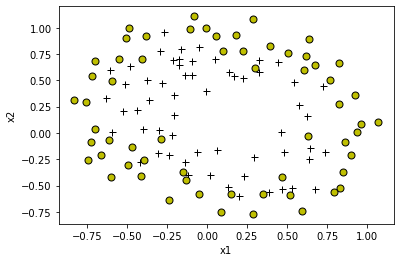

In [ ]:
#X=oldX
# Plot fiqure 1 (data)    
plt.clf()             
plt.figure(1)
plt.xlabel('x1')
plt.ylabel('x2')

pos = sp.where(Y == 1)[0]
neg = sp.where(Y == 0)[0]

plt.plot(X[pos, 1], X[pos, 2], 'k+', linewidth=2, markersize=7)
plt.plot(X[neg, 1], X[neg, 2], 'ko', markerfacecolor='y', markersize=7)

In [ ]:
# # Plot fiqure 2 (borde de decision)
# plt.figure(2)
# plt.xlabel('x1')
# plt.ylabel('x2')

# pos = sp.where(Y == 1)[0]
# neg = sp.where(Y == 0)[0]

# plt.plot(X[pos, 1], X[pos, 2], 'ko', markerfacecolor='b',linewidth=2, markersize=10)
# plt.plot(X[neg, 1], X[neg, 2], 'ko', markerfacecolor='y', markersize=10)


In [ ]:
p = predict(theta, X)
r = np.mean(np.double(p == Y)) * 100
print(r)

94.91525423728814


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp


[[-1.08963921e+13 -9.66968574e+12 -9.44917378e+12 ... -5.64643784e+13
  -1.89083891e+14 -7.67069095e+14]
 [-2.93591112e+12 -1.73305379e+12 -1.52529990e+12 ... -3.81137066e+13
  -1.66622304e+14 -7.32117173e+14]
 [-1.64603070e+12 -4.56217636e+11 -2.52532133e+11 ... -3.42718311e+13
  -1.59994413e+14 -7.15431549e+14]
 ...
 [-2.47228785e+15 -2.34794219e+15 -2.23749515e+15 ... -1.35662651e+15
  -1.48435905e+15 -2.03815950e+15]
 [-1.11996855e+16 -1.06917749e+16 -1.02347630e+16 ... -6.30076341e+15
  -6.44293909e+15 -7.01612413e+15]
 [-4.82143206e+16 -4.62204453e+16 -4.44141427e+16 ... -2.80654965e+16
  -2.82591984e+16 -2.88919842e+16]]
Train Accuracy: 94.91525423728814%


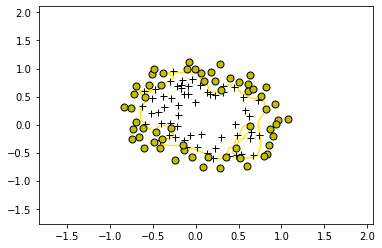

In [ ]:
#Borde de decision
plt.plot(X[pos, 1], X[pos, 2], 'k+', linewidth=2, markersize=7)
plt.plot(X[neg, 1], X[neg, 2], 'ko', markerfacecolor='y', markersize=7)
# X = (X - mean(X))/std(X) 
plt.ylim(np.min(X[:, 2])-1, np.max(X[:, 2])+1)

# u = np.linspace(-0.6145, -0.6146,50)
# v = np.linspace(-0.6145, -0.6146,50)
u = np.linspace(np.min(X[:, 1])-1, np.max(X[:, 1])+1,num=50)
v = np.linspace(np.min(X[:, 2])-1, np.max(X[:, 2])+1,num=50)
# print(u)
# print(v)
# print(theta)
z = np.matrix(
      np.reshape(
        [ mapFeature(u[i], v[j]) * theta
           for i in range(0, len(u))
           for j in range(0, len(v)) 
        ], [50, 50])).T
print(z) 


plt.contour(u, v, z, 0)

print("Train Accuracy: {r}%".format(**locals()))

In [ ]:
print(theta)

[[  5.11015589]
 [  3.20613103]
 [  4.11018218]
 [-11.89482701]
 [ -7.42328973]
 [-11.66711173]]
